# Polynomial Regression and Case Study

## 0. Setup

As with our previous worksheet, we will begin by invoking some Jupyter magic and running the `setup.py` script to configure this notebook to import the necessary packages and load some helper functions we will be using later.

In [3]:
%matplotlib inline

In [4]:
%run setup.py

from scipy import stats
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns

## 1. Polynomial models

Now we will consider the situation where we are interested in estimating a function that is non-linear. Below are observations of the independent variable `x` and dependent variable `y`.

In [285]:
x = np.array([
    0.0187898 , 0.0202184 , 0.06022547, 0.07103606, 0.0871293 , 0.11827443, 0.1289263 , 0.14335329, 0.21038256, 0.26455561,
    0.31542835, 0.3595079 , 0.36371077, 0.38344152, 0.41466194, 0.4236548 , 0.43703195, 0.43758721, 0.45615033, 0.46147936,
    0.52184832, 0.52889492, 0.54488318, 0.5488135 , 0.56804456, 0.56843395, 0.60276338, 0.61209572, 0.616934  , 0.6176355 ,
    0.63992102, 0.64589411, 0.66676672, 0.67063787, 0.6818203 , 0.6976312 , 0.71518937, 0.77423369, 0.77815675, 0.78052918,
    0.79172504, 0.79915856, 0.83261985, 0.87001215, 0.891773  , 0.92559664, 0.94374808, 0.94466892, 0.96366276, 0.97861834
])

y = np.array([ 
    0.81850358,  1.1824961 ,  0.83923596,  0.80455289,  0.64957466,  0.67644428,  0.36828029,  0.40909561, -0.17100076, -0.44688282,
   -0.83847579, -1.0679183 , -0.96247568, -0.94872222, -0.98672531, -0.95254448, -1.02143317, -0.9930154 , -0.97156975, -0.92162695,
   -0.65729412, -0.70250735, -0.40175015, -0.43145416, -0.41137072, -0.19910907, -0.06902804,  0.10005129,  0.2055166 ,  0.15096471,
    0.42236707,  0.22921419,  0.54091452,  0.45828255,  0.51221126,  0.6359448 ,  0.75508157,  0.98520989,  0.86880526,  1.07841262,
    1.04445505,  0.84635379,  1.11618622,  1.04217923,  0.86916685,  0.53367541,  0.32049347,  0.52646495,  0.24121593,  0.28938747
])

n = len(x)

When we plot these data we see that there is clearly not a linear relationship between `x` and `y` but rather some kind of periodic or sinusoidal relationship.

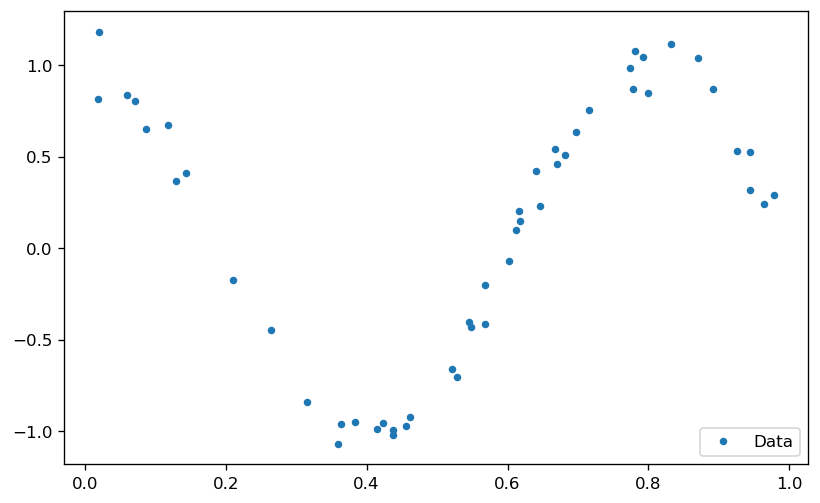

In [286]:
plt.plot(x, y, ".", label = "Data")
plt.legend(loc="lower right")
plt.show()

We can fit a linear model to these data, but given the shape of the data we know apriori that it will do a poor job of capturing the relationship of these data.

In [287]:
linear_reg = LinearRegression(fit_intercept = False)

X = np.c_[np.ones(n), x]
reg = linear_reg.fit(X, y)

y_hat = reg.predict(X)

When we plot the data and regression line we can see that this is a poor model with a relatively large RMSE.

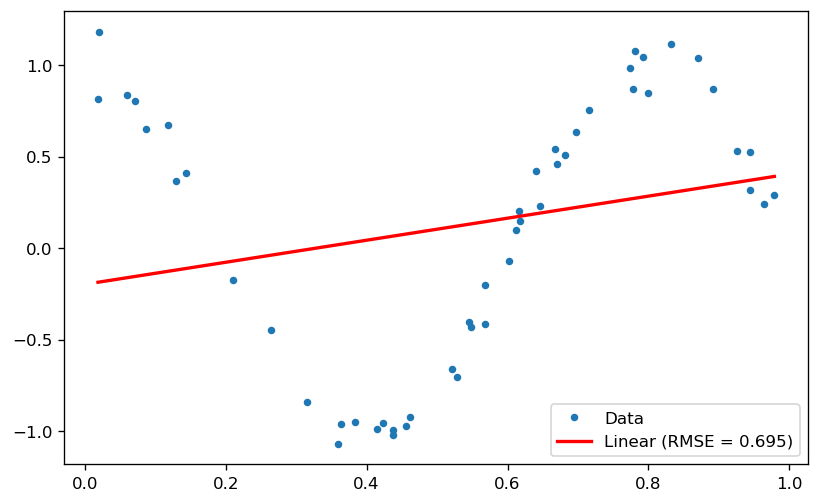

In [288]:
plt.plot(x, y, ".", label = "Data")
plt.plot(x, y_hat, "r-", label = "Linear (RMSE = %.3f)" % rmse(y, y_hat))
plt.legend(loc="lower right")
plt.show()

### A Quadratic Model

One of the interesting tricks we can play with linear regression is that we can easily fit any model as long as the regression equation is a *linear* function of the $\beta$s. What this means is that we can perform any transformation we would like on our predictor(s) (e.g. `x`) and still have a valid and solvable regression equation.

For non-linear patterns, one of the more straight forward transformations is to use a polynomial transformation of our predictor(s). So for example, a line does not do a good job describing our data, but maybe a parabola would be a better fit. In that case we can then consider a regression equation with the following structure,

$$ y_i = \beta_0 + \beta_1 x_i + \beta_2 {x_i}^2 $$

This equation is still linear in terms of $\beta$ and therefore can still be fit by our standard least squares mechanics. We construct out model matrix by simply including an additional column which is composed of the square of the elements of `x`.

$$ \boldsymbol{X} = \big[ \boldsymbol{1}, \boldsymbol{x}, \boldsymbol{x}^2 \big] $$

This can be accomplished in a similar way within Python using `np.c_` and we can then feed the quadratic polynomial model matrix into the `LinearRegression` fit methods to obtain a model fit.

In [289]:
X2 = np.c_[np.ones(n), x, x**2]
reg2 = linear_reg.fit(X2, y)

y_hat2 = reg2.predict(X2)

As before we can then plot the results of this model fit along with the data and the linear fit to see how we've done. The quadratic model is a bit better both in apparent fit and RMSE but still does not do a great job describing the data.

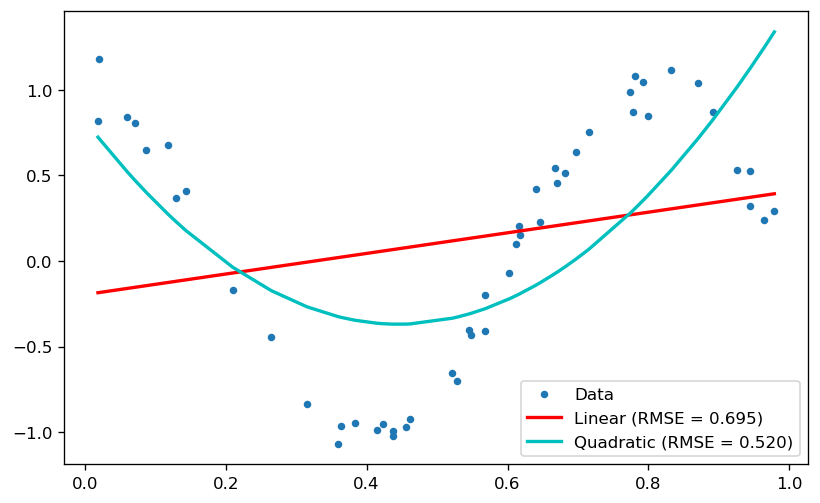

In [290]:
plt.plot(x, y, ".", label = "Data")
plt.plot(x, y_hat, "r-", label = "Linear (RMSE = %.3f)" % rmse(y, y_hat))
plt.plot(x, y_hat2, "c-", label = "Quadratic (RMSE = %.3f)" % rmse(y, y_hat2))
plt.legend()
plt.show()

Clearly, the quadratic model is more flexible than the linear model, but is not flexible enough for our data particularly well. 

---

### &diams; Exercise 1.1

What are the $\beta$s for this quadratic model? Using latex write out the regression model for the least squares fit of a quadric polynomial for these data.

**Solution**

In [291]:
reg2.coef_

array([ 0.82208021, -5.35043754,  6.00653128])

$$ y_i = 0.822 - 5.35 x_i + 6 {x_i}^2 $$

---

### &diams; Exercise 1.2

In context what is the interpretation of the $\beta$ values we have obtained for this model?

**Solution**

* $\beta_0$ - The expected value of $y$ when $x = 0$. 

* $\beta_1$ - The expected increase in $y$ when $x$ is increased by 1, all else being equal.

* $\beta_2$ - The expected increase in $y$ when $x^2$ is increased by 1, all else being equal.

---

## 2. Higher order polynomials

Based on what we've just seen, it appears that we should be able to continue to increase the degree of the polynomial in our model to obtain a better fit to the data. Below we will define a function which will allow us to pick a degree for the polynomial model it will then fit and plot the results of that model. 

As with the previous examples we constructed by hand, this function creates a model matrix which includes $\boldsymbol{x}^0, \boldsymbol{x}^1, \ldots, \boldsymbol{x}^d$ and then uses that model matrix to solve for the model's $\boldsymbol{\beta}$s using sklearn's `LinearRegression` object. The model that is fit will have the form,

$$ \hat{y}_i = \sum_{j=0}^{d} \beta_j {x_i}^j = \beta_0 + \beta_1 x_i + \cdots + \beta_d {x_i}^d $$

where $d$ is determined by your choice of `degree`.

Note that whenever we consider a polynomial of order $d$ that we always include predictors for polynomial transformations of the predictors from degree $0$ to $d-1$ as well.

<function matplotlib.pyplot.show(*args, **kw)>

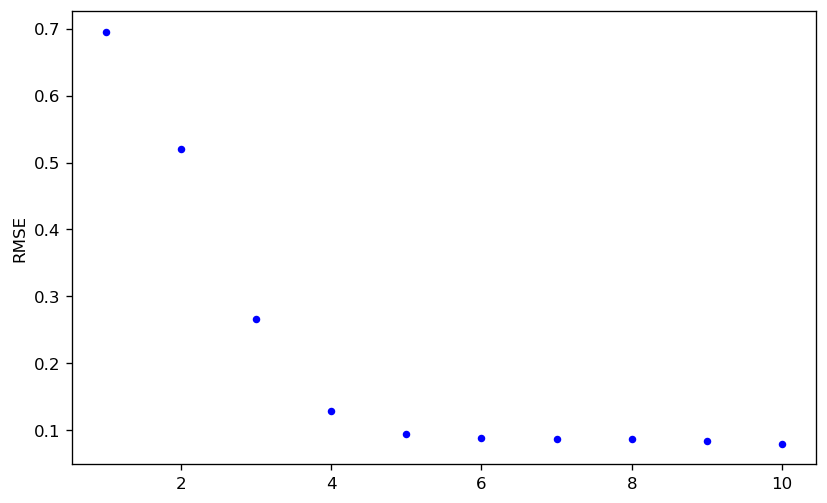

In [292]:
def poly_model_matrix(x, degree):
    return np.c_[ [x**i for i in range(0,degree+1)] ].T  # Python list comprehension to construct model matrix

def poly_rmse(x, y, degrees):
    rmse_out = []
    for degree in degrees:
        X = poly_model_matrix(x, degree)
        reg = linear_reg.fit(X, y)
        y_hat = reg.predict(X)
        rmse_out.extend([rmse(y, y_hat)])
    return rmse_out
    

degrees = range(1,11)
RMSE = poly_rmse(x, y, degrees)

plt.plot(degrees, RMSE, 'b.')
plt.ylabel('RMSE')
plt.show

---

### &diams; Exercise 2.1

Based on the plot of RMSE by degree of polynomial, choose two  polynomial models which may be a suitable fit to the data. 
* Enter the degree of these polynomials in the cell below. 
* Justify your answers. 
* Plot the corresponding regression lines.

**Solution**

In [293]:
degree1 = 4
degree2 = 5

The decrease in RMSE becomes negligible after increasing the degree of the polynomial beyond five. However, the decrease in RMSE between the 4th and 5th order polynomial is also relatively small and further testing is needed to determine whether the addition of a 5th term is justified or would result in overfitting. 

50
50


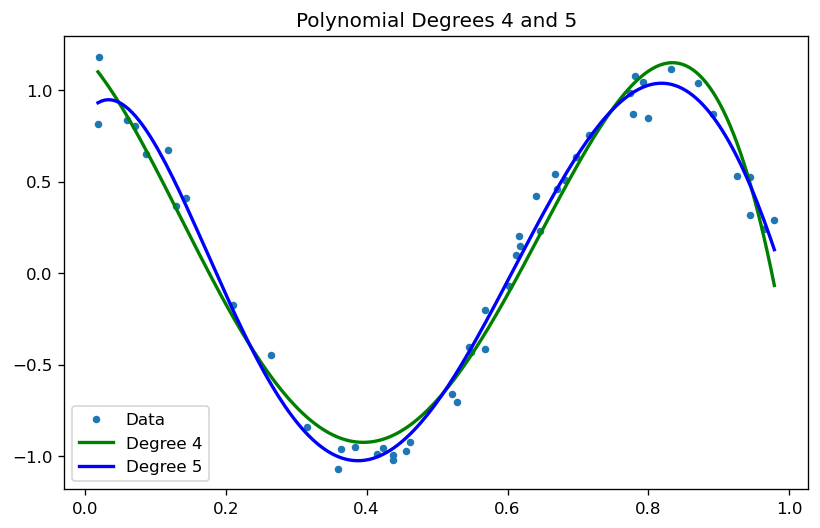

In [294]:
x_pred = np.linspace(min(x), max(x), num=200) # Construct prediction location data

def poly_pred(x, x_pred, degree):
    X_pred = poly_model_matrix(x_pred, degree)  # Construct model matrix for the prediction data 
    X = poly_model_matrix(x, degree)
    reg = linear_reg.fit(X, y)
    y_pred = reg.predict(X_pred)                # Calculate predictions using prediction data
    y_hat = reg.predict(X)
    print(len(y_hat))
    return(y_pred, y_hat)
      
# Plot the data and regression line
plt.plot(x, y, ".", label="Data")    
plt.plot(x_pred, poly_pred(x, x_pred, degree1)[0], "g-", label="Degree %d" % (degree1))
plt.plot(x_pred, poly_pred(x, x_pred, degree2)[0], "b-", label="Degree %d" % (degree2))
plt.title("Polynomial Degrees %d and %d" % (degree1, degree2))
plt.legend()
plt.show() 

---
## 3. Model evaluation

If the model is a good fit we would expect to see that:
* On average, the fitted values  $\hat{y}$ correspond to the observations, i.e. $E(\mathbf(y))=E(\hat{\mathbf(y)}) \Rightarrow E(\mathbf(y)-\hat{\mathbf(y)})=0$,
* There is no systematic bias, i.e. the fitted values do not systematically over- or underestimate the observations and the residuals are therefore symetrically distributed around zero accross the range of fitted values,
* There is no indication of a possible interaction being missed or of a linear relationship being inappropriate such as variance or bias changing depending on the value of the estimates.

In fact, the above bullet points are starting assumptions for common subsequent analyses which are not within the scope of this course. However, we will use these to evaluate whether any model we fit appears reasonable or not. To investigate these points for the above polynomial model, we can plot the residuals and the observations against the fitted values.

50
50
50
50


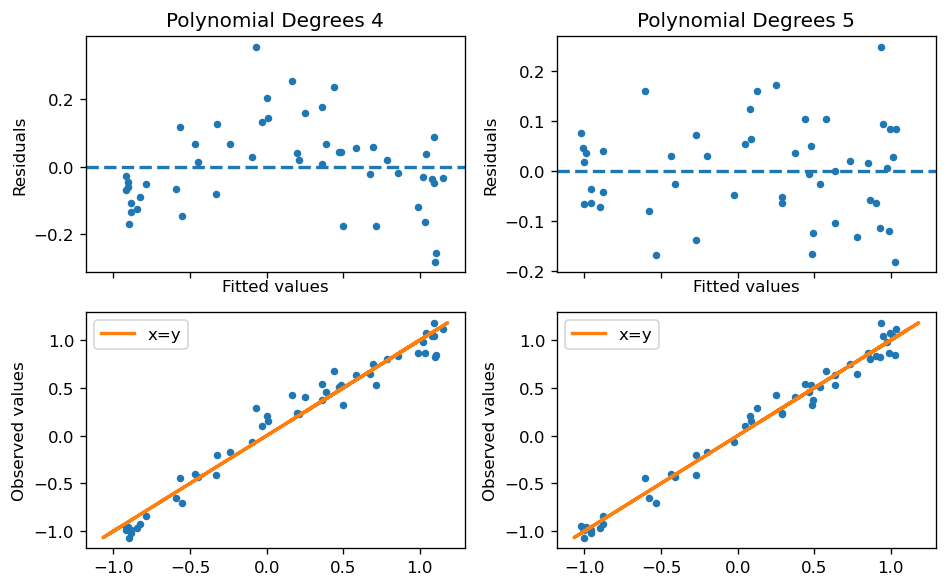

In [295]:
residuals1 = y - poly_pred(x, x_pred, degree1)[1]
residuals2 = y - poly_pred(x, x_pred, degree2)[1]

fits1 = poly_pred(x, x_pred, degree1)[1]
fits2 = poly_pred(x, x_pred, degree2)[1]

f, (ax1, ax2) = plt.subplots(2, 2, sharex = True)
ax1[0].plot(fits1, residuals1,'.')
ax1[0].set_ylabel("Residuals")
ax1[0].set_xlabel("Fitted values")
ax1[0].axhline(y=0, ls='--')
ax1[0].set_title("Polynomial Degrees %d" % (degree1))

ax1[1].plot(fits2, residuals2,'.')
ax1[1].set_ylabel("Residuals")
ax1[1].set_xlabel("Fitted values")
ax1[1].axhline(y=0, ls='--')
ax1[1].set_title("Polynomial Degrees %d" % (degree2))

ax2[0].plot(fits1, y,'.')
ax2[0].plot(y, y,'-',label='x=y')
ax2[0].set_ylabel("Observed values")
ax2[0].legend()

ax2[1].plot(fits2, y,'.')
ax2[1].plot(y, y,'-',label='x=y')
ax2[1].set_ylabel("Observed values")
ax2[1].legend()

plt.tight_layout()

---
### &diams; Exercise 3.1

Based on the above figures does either model appear reasonable? Justify your answers. 

**Solution**

The residuals vs fits and observed vs fits plots for the fourth order polynomial indicate that the higher and lower fitted values overestimate the data whereas the middle fitted values underestimate the data. This indicates that the shape of our model is perhaps not appropriate.

The fifth order polynomial appears reasonable as it is evenly spread around zero accross the range of fitted values.

---
## 4. Case study


We will now apply what we've learned so far to investigate factors affecting life expectancy in different countries around the world. To do this we will load a subsetted dataset (1) that contains data from the World Health Organization (WHO)'s Global Health Observatory (GHO) data repository on the life expectancy, and potential explanatory variables, between 2000-2015 in 193 different countries.  

(1) Subset of: Kumar Rajarshi. (Feb 2018). Life Expecancy (WHO), 1. https://www.kaggle.com/kumarajarshi/life-expectancy-who.

|**Data dictionary:**|                                                                                          |
|--------------------|------------------------------------------------------------------------------------------|
|Life.expectancy | Life expectancy in age |
|Alcohol | Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) |
|BMI | Average Body Mass Index of entire population|
|Total.expenditure | General government expenditure on health as a percentage of total government expenditure (%)|
|GDP | Gross Domestic Product per capita (in USD)|
|Population | Population of the country|
|Schooling | Number of years of Schooling(years)| 

In [7]:
import pandas as pd      #The pandas package allows you to create and manipulate dataframes 
                        #each row corresponds to an observation and each column to a named variable (like a spreadsheet)

life_df = pd.read_csv('life_ex.csv')  
print(life_df.describe())             

       Life.expectancy      Alcohol          BMI  Total.expenditure  \
count      2073.000000  2074.000000  2074.000000        2071.000000   
mean         69.655330     4.710178    42.170540           5.904891   
std           9.273377     3.992869    15.811194           2.324619   
min          36.300000     0.010000    15.000000           0.760000   
25%          64.300000     0.970000    25.725000           4.295000   
50%          72.400000     4.075000    46.900000           5.810000   
75%          75.600000     7.737500    56.075000           7.470000   
max          89.000000    14.970000    64.900000          14.390000   

                 GDP    Population    Schooling  
count    1866.000000  1.721000e+03  2074.000000  
mean     7610.945420  1.119933e+07    12.249904  
std     14098.503064  4.150725e+07     2.994050  
min         1.681350  3.400000e+01     2.900000  
25%       511.371202  2.181220e+05    10.400000  
50%      1906.305786  1.419631e+06    12.400000  
75%      6

---

### &diams; Exercise 4.1

Have a look at the above data summary and share any first thoughts. Are there any variables you expect to have a positive/negative or no impact at all on life expectancy? Do all values seem reasonable?

**Solution**

No right or wrong answer. Population size is probably unlikely to affect life expectancy and should mostly be useful as a denominator for other variables. It seems surprising that 75% of countries have a an average BMI>25. Could it be using non-SI units? GDP seems to have a very long tail.

---

There appears to be missing data in some of the columns so we'll remove these rows and rename a couple of longer named variables before having a first look at the data.

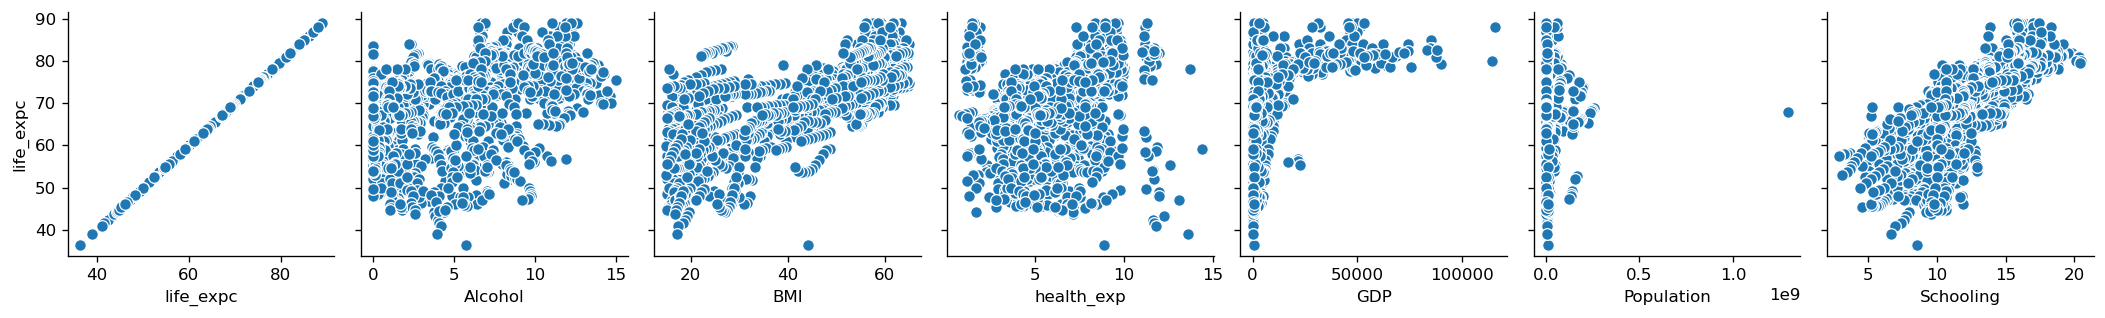

In [8]:
life_df.dropna(inplace = True)
life_df.rename(columns={'Life.expectancy':'life_expc','Total.expenditure':'health_exp'},inplace=True)

pp = sns.pairplot(data=life_df,
                  y_vars=['life_expc'],
                  x_vars=life_df.columns)

At first sight you might notice that:
* the relatioinship with GDP and population size doesn't appear to be linear,
* there seems to be a strong positive relationship with schooling and perhaps BMI.

However there are many data points and it's hard to tell from these scatter plots whether it is reasonable to assume that the relationship between life expectancy and any of these variables is linear, on average. 

A way to visualise the relationship **on average** between life expectancy and the explanatory variables for initial exploration is to plot the mean value of life expectancy for groups of similar values (bins) of an explanatory variable.

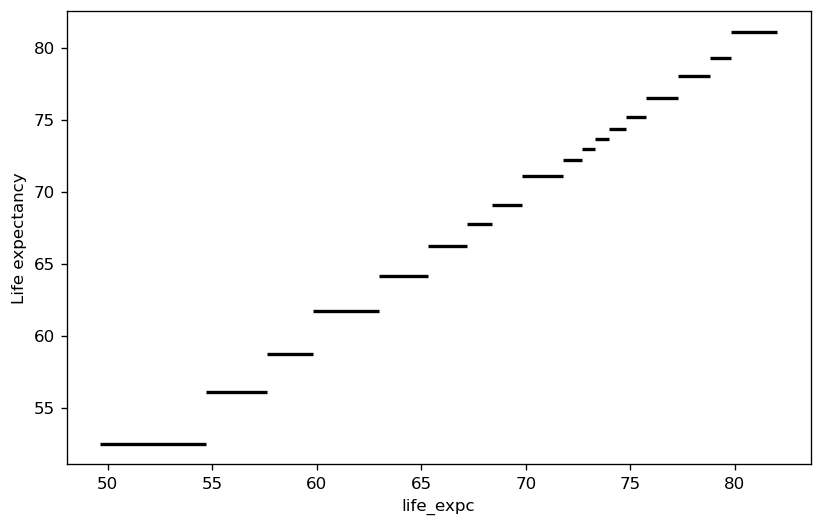

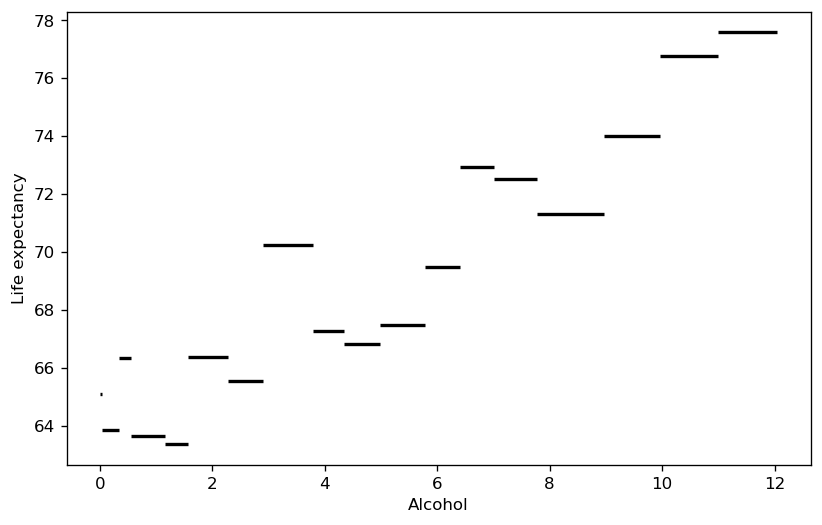

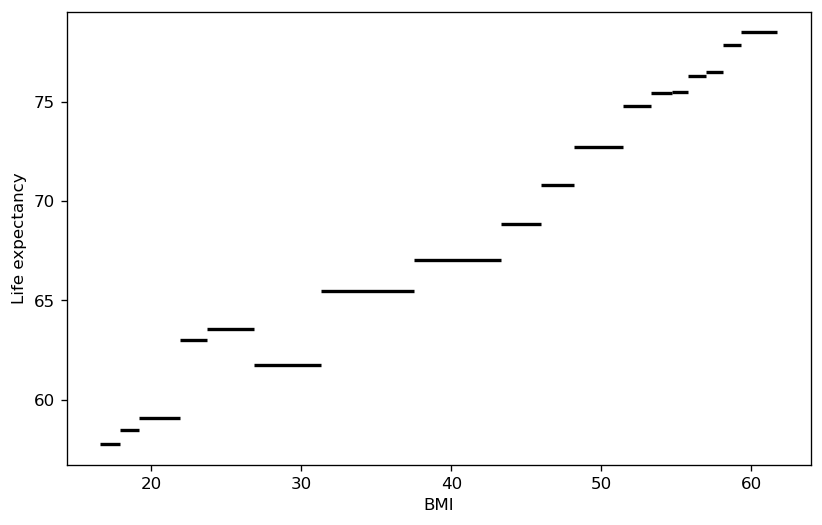

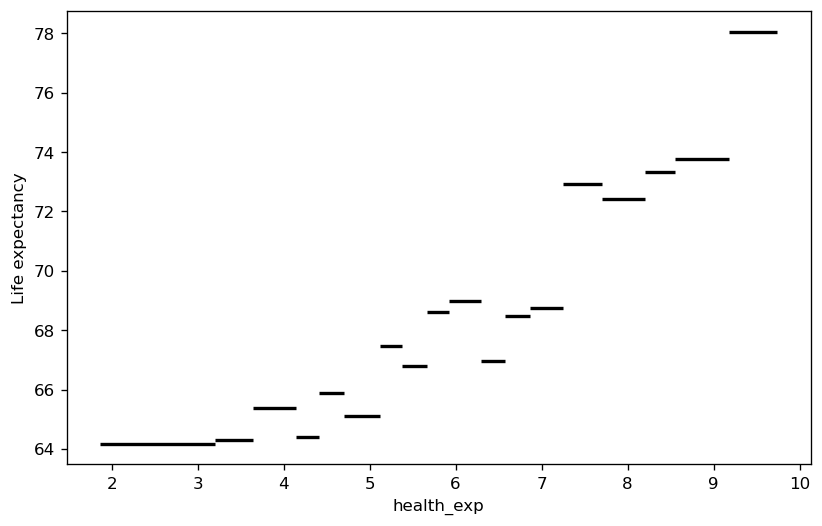

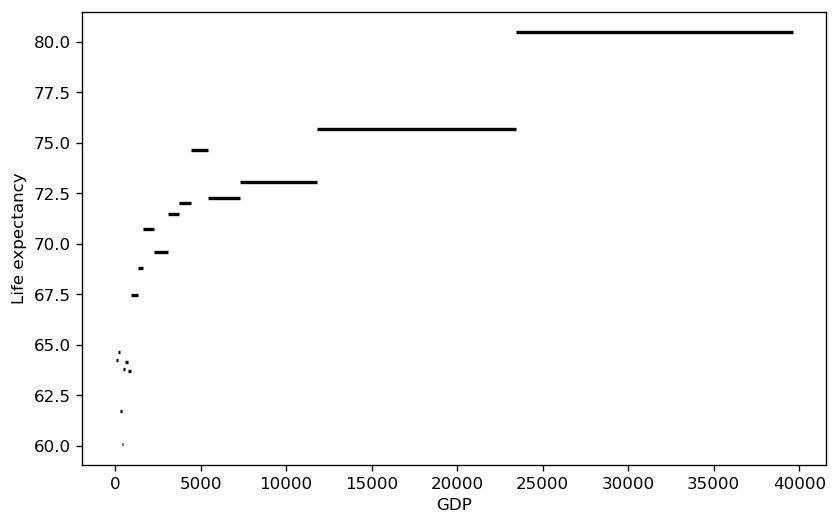

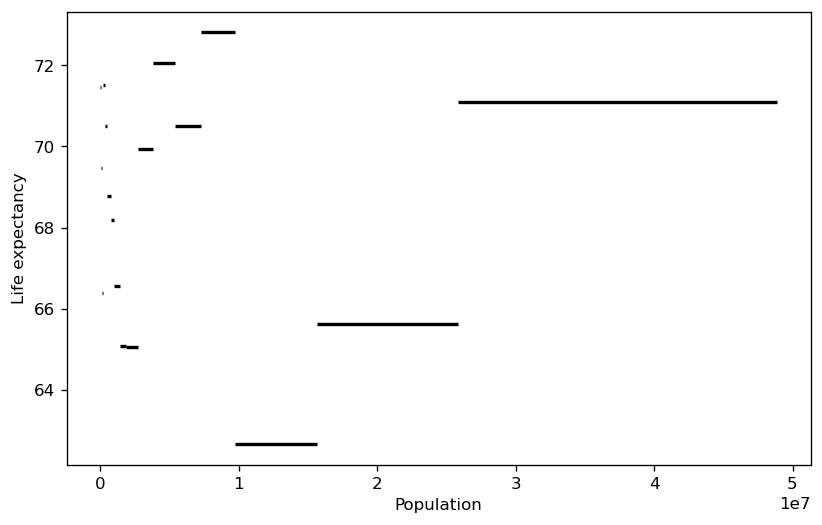

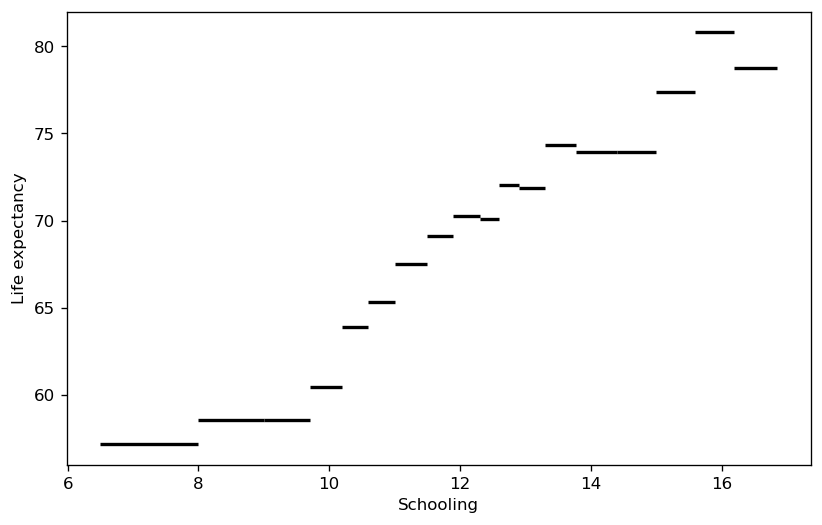

life_expc     None
Alcohol       None
BMI           None
health_exp    None
GDP           None
Population    None
Schooling     None
dtype: object

In [9]:
def binned_stats(var):
    bin_means, bin_edges, binnumber = stats.binned_statistic(var,
                       life_df.life_expc,
                       statistic='mean', 
                       bins=np.quantile(var,np.arange(0.05,1,0.05)))
    plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:])
    plt.xlabel(var.name)
    plt.ylabel('Life expectancy')
    plt.show()
    
life_df.apply(binned_stats,axis=0)

---

### &diams; Exercise 4.2

Based on the binned means plots above, discuss, for each explanatory variable, whether assuming a linear relationship is fairly reasonable. If not, is there a transformation we could do or a polynomial that would explain the relationship better?

**Solution**

A log transformation seems suitable for GDP and population size. Health expenditure might follow a quadratic curve and Schooling a cubic curve (other justifiable suggestions are good too but we will run these for illustration purposes). We'll assume a linear relationship for all other variables. 

---

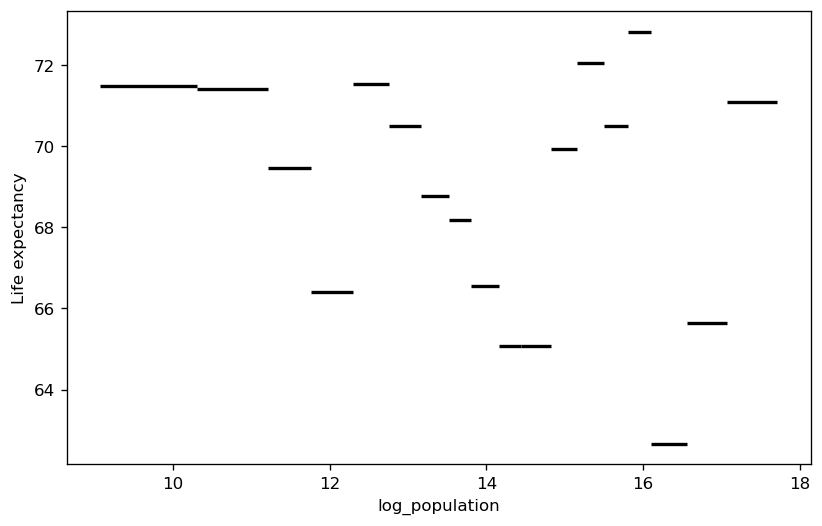

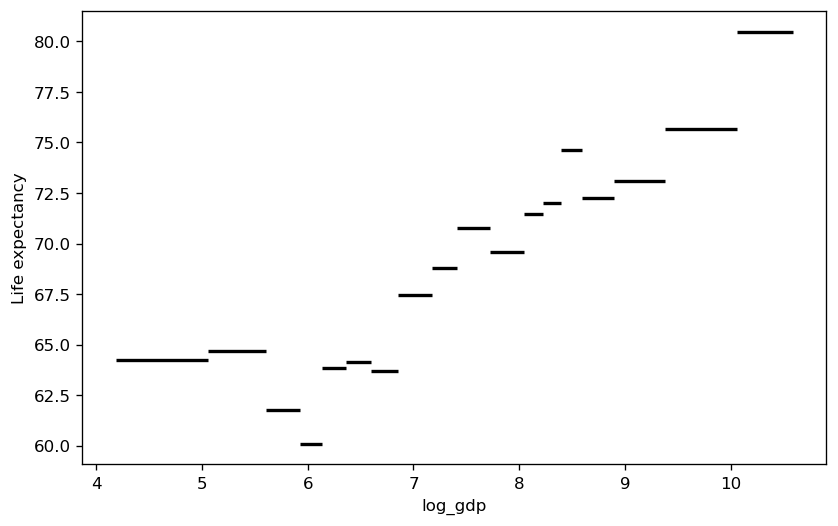

In [12]:
life_df['log_population'] = np.log(life_df.Population)
binned_stats(life_df.log_population)

life_df['log_gdp'] = np.log(life_df.GDP)
binned_stats(life_df.log_gdp)

---

### &diams; Exercise 4.3

Based on the above exploration create a copy of the life dataframe including only the explanatory variables you will use in your model and use it to create the explanatory data matrix $\mathbf{X}$. 


**Solution**

In [13]:
life_df2 = life_df.copy()
life_df2.drop(columns=['life_expc','Population','GDP','log_population'],axis=0,inplace=True)

#Create the explanatory data matrix
X = np.c_[np.ones((life_df2.shape[0],1)), life_df2,life_df2.health_exp**2,life_df2.Schooling**2,life_df2.Schooling**3]

---

We will now fit a  linear regression using the explanatory data matrix $\mathbf{X}$ you created and examine the residuals vs fits and fitted vs observed plots, below.

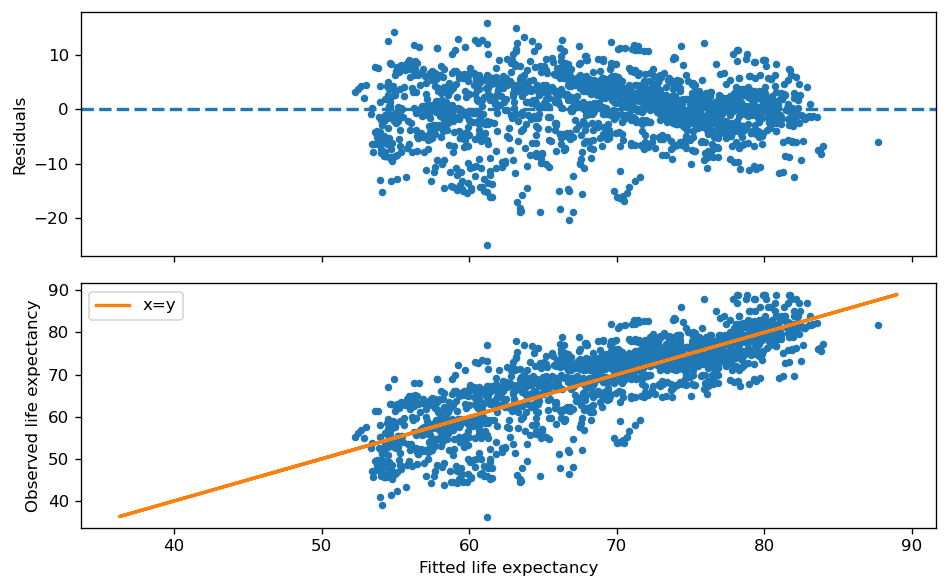

In [14]:
#Regression
linear_reg = LinearRegression()
reg = linear_reg.fit(X, life_df.life_expc)
fitted_lifexp = reg.predict(X)
residuals = life_df.life_expc - fitted_lifexp

#Plot residuals and observed data vs fits 
f, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
ax1.plot(fitted_lifexp, residuals,'.')
ax1.set_ylabel("Residuals")
ax1.axhline(y=0, ls='--')

ax2.plot(fitted_lifexp, life_df.life_expc,'.')
ax2.plot(life_df.life_expc, life_df.life_expc,'-',label='x=y')
ax2.set_ylabel("Observed life expectancy")
ax2.set_xlabel("Fitted life expectancy")
ax2.legend()

plt.tight_layout()

---

### &diams; Exercise 4.4

Based on the above plots, does our model appear reasonable? Justify your answers.

**Solution**

Yes, the residuals are evenly spread around zero across the range of fitted values, and the plot of observed vs fitted values seems to follow the line of equality. 

---

### &diams; Exercise 4.5

Print out the model parameters and the RMSE and interpret the results. Do they match your expectation?

In [15]:
#Print outputs
print(r'Intercept {:.3f}'.format(reg.intercept_))
coef_names = life_df2.columns.tolist()
coef_names.extend(['health_exp^2','Schooling^2','Schooling^3'])
print(np.c_[coef_names,reg.coef_[1:]])
print(r'RMSE {:.3f}'.format(rmse(life_df.life_expc,fitted_lifexp)))

Intercept 61.382
[['Alcohol' '-0.4123837170727016']
 ['BMI' '0.20985680930548437']
 ['health_exp' '-0.7158251888362185']
 ['Schooling' '-4.686089149233527']
 ['log_gdp' '0.5359576570482434']
 ['health_exp^2' '0.04299326289809387']
 ['Schooling^2' '0.5846785081251776']
 ['Schooling^3' '-0.016514545507709477']]
RMSE 5.486


**Solution**

* In the initial data we saw that mean life expectancy was ~69 with a st.dev. of ~9 and the model has an intercept of ~61 and RMSE ~5.5. So the scale seems right.
* There is a positive relationship between BMI and life expectancy. Each additional unit of BMI increases life expectancy by 0.2. This is difficult to interpret without knowing how this value was calculated. 
* There is a positive relationship between log_gdp and life expectancy. Each additional unit of log_gdp $log\_gdp + 1 = log(e*GDP)$, increases life expectancy by 0.5.
* There is a negative relationship with alcohol consumption i.e. each additional unit decreases life expectancy by 0.4.
* While each term of the cubic and the quadratic relationship can be interpreted in a similar way, it is difficult to interpret the impact of health expenditure and schooling as it is.

---

### &diams; Exercise 4.6

To help assess the impact of schooling and health expenditure, estimate the fitted value at the 25th, 50th and 75th quantile for each. Do the relationships appear as expected?

**Solution**

In [20]:
print([reg.coef_[3]*q + reg.coef_[6]*q**2 for q in np.quantile(life_df2.health_exp, [0.25,0.5,0.75])])
print([reg.coef_[4]*q + reg.coef_[7]*q**2 + reg.coef_[8]*q**3 for q in np.quantile(life_df2.Schooling,[0.25,0.5,0.75])])

[-2.3206518065993045, -2.7319588790276983, -2.9627833968108974]
[-4.4935251459838526, 0.0857422033909323, 4.447083042581674]


The impact of schooling on life expectancy is as might be expected, with low levels of schooling decreasing life expectancy and high levels increasing it. Note that the decrease/increase at the 25th/75th quantile, respectively, is close to the value of the RMSE, therefore, it might be worth investigating how much of the variance schooling alone explains.

Health expenditure, on the other hand, seems to decrease life expectancy for all values and have a negative relationship. Further investigation would be needed in a real study.